In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Exercise 1: Coin-flipping
### Given a set of 10 coins, with one of them unfair (both sides are tail), and all others fair. 

#### 1. We pick a coin randomly. What is the probability that this coin is unfair? 
P(unfair) =  1/10

#### 2. If we toss this coin, what is the probability that we get tail?
There are 20 sides (2x10). 11 of them are tails. P(tail) = 11/20

#### 3. We now toss this coin and get tail. What is the probability that this coin is unfair?
P(unfair|tail) = P(unfair and tail)/P(fair and tail) = (1/10)/(9/10x1/2) = 2/9 = 0.222222

#### 4. Write a simulation to check your result obtained under 3.

In [47]:
def cointoss(p):
    # 1 tail, 0 head
    result = np.random.binomial(1,p)
    return result

In [48]:
def coinpick(p):
    p_tail_unfair = 1
    p_tail_fair = 0.5
    # 1 unfair, 0 fair
    result = np.random.binomial(1,p)
    if result == 0:
        return p_tail_fair
    elif result == 1:
        return p_tail_unfair 

In [51]:
p_unfair = 1/10
n = 10000
total = np.arange(n)
unfairtail, fairtail = 0, 0 
for i in range(0, n):
    p = coinpick(p_unfair)
    total[i] = cointoss(p)
    if p == 1 and total[i] == 1:
        unfairtail += 1
    if p == 0.5 and total[i] == 1:
        fairtail += 1
    i+=1
        
print("Number - tail and unfair coin: ", unfairtail)
print("Number - tail and fair coin: ", fairtail)
print("Probability that the coin is unfair, if we toss the coin and get tail: ", unfairtail/fairtail)

print("Number - tail: ", np.count_nonzero(total == 1))
print("Number - head: ", np.count_nonzero(total == 0))


Number - tail and unfair coin:  1034
Number - tail and fair coin:  4526
Probability that the coin is unfair, if we toss the coin and get tail:  0.2284577993813522
Number - tail:  5560
Number - head:  4440


# Exercise 2: Read in and study data (5 Points): 
#### 1. Extract the data and create the following variables (as numpy arrays): year, marriages, divorces, population, marriages per 1000 people, divorces per 1000 people.

In [2]:
df = np.loadtxt(r"/Users/Ida/Desktop/Stat. Methoden der Datenanalyse/StatMethods2022/notebooks/data/us_marriages_divorces.csv",
                 delimiter=",", skiprows =1, dtype=float) #Year', 'Marriages', 'Divorces', 'Population', 'Marriages_per_1000', 'Divorces_per_1000'

#### 2. Plot the evolution of marriages and divorces as a function of time.

Text(0, 0.5, 'Number of Marriges vs Divorces')

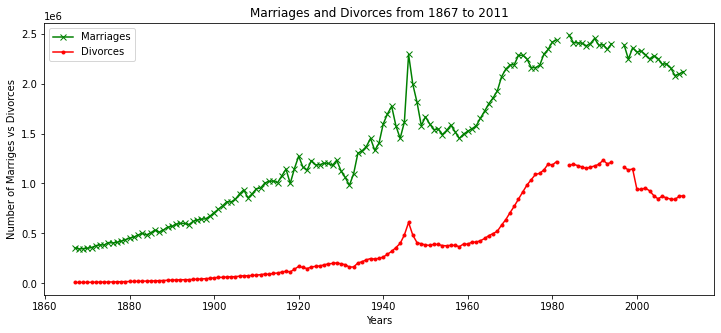

In [4]:
plt.figure(figsize=(12, 5))
plt.title('Marriages and Divorces from 1867 to 2011')
plt.plot(df[:,0], df[:,1], color='green', marker='x', label = "Marriages")
plt.plot(df[:,0], df[:,2], color='red', marker='.', label = "Divorces")
plt.legend()
plt.xlabel("Years")
plt.ylabel("Number of Marriges vs Divorces")

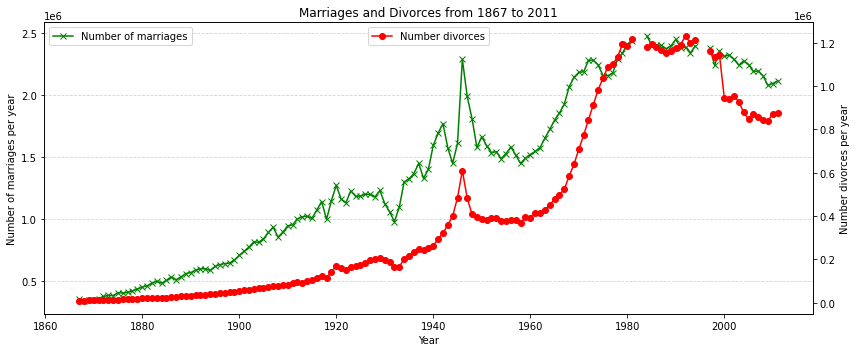

In [5]:
fig, ax = plt.subplots(figsize=(12,5))
ax.set_title('Marriages and Divorces from 1867 to 2011')
ax2 = ax.twinx()
ax.set_xlabel('Year')
ax.plot(df[:,0], df[:,1], color='green', marker='x', label = "Marriages")
ax2.plot(df[:,0], df[:,2], color='red', marker='o', label = "Divorces")
ax.set_ylabel('Number of marriages per year')
ax2.set_ylabel('Number divorces per year')
ax.legend(['Number of marriages'])
ax2.legend(['Number divorces'], loc='upper center')
#ax.set_xticks(np.arange(0,160,16))
#ax.set_yticks(np.arange(0,150, 15))
#ax.set_xticklabels(rotation=90)
#ax2.set_yticks(np.arange(0,150, 15))
ax.yaxis.grid(color='lightgray', linestyle='dashed')
plt.tight_layout()
plt.show()

#### 3. When was the maximum of marriages per 1000 people (hint: see the argmax option of
numpy)? When was the maximum of divorces per 1000 people?

In [6]:
print(int(df[np.argmax(df[:,4])][0]), "was the maximum of marriages per 1000 people:", max(df[:,4]), "\n",
      int(df[np.argmax(df[:,5])][0]), "was also the maximum of divorces per 1000 people:", max(df[:,5]))

1982 was the maximum of marriages per 1000 people: 16.2 
 1982 was also the maximum of divorces per 1000 people: 5.3


#### 4. Plot the histogram of marriages per 1000 people. What is the median, mean, standard
deviation (std) and normalised mean absolute deviation (nmad) of the distribution?

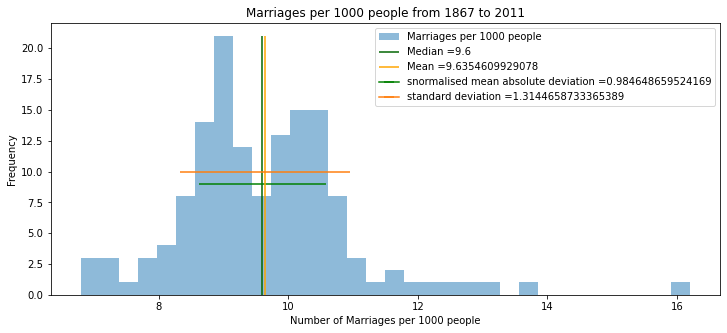

In [8]:
plt.figure(figsize=(12, 5))
plt.title('Marriages per 1000 people from 1867 to 2011')
n, bins, patches = plt.hist(x=df[:,4], bins=32, alpha = 0.5,  label = "Marriages per 1000 people")
plt.vlines(np.nanmedian(df[:,4]), 0, 21, color = "darkgreen", label = ("Median =" +str(np.nanmedian(df[:,4]))))
plt.errorbar(np.nanmedian(df[:,4]), 9, xerr= np.nanmean(np.absolute(df[:,4] - np.nanmean(df[:,4]))), color = "green", label = "snormalised mean absolute deviation =" +str(np.nanmean(np.absolute(df[:,4] - np.nanmean(df[:,4])))) )
plt.vlines(np.nanmean(df[:,4]), 0, 21, color = "orange", label = ("Mean =" +str(np.nanmean(df[:,4]))))
plt.errorbar(np.nanmean(df[:,4]), 10, xerr= np.nanstd(df[:,4]), label = "standard deviation =" +str(np.nanstd(df[:,4])) )
plt.xlabel("Number of Marriages per 1000 people")
plt.ylabel("Frequency")
plt.legend()

#### 5. What was the average US population during the 30s, and during the 2000s?

In [30]:
sum30s, sum00s = 0,0 
liste = np.where((df[:,0] > 1929) & (df[:,0] < 1940))[0]
for i in liste:
    sum30s += df[i,3]
    sum00s += df[i+70,3]
av30s =  sum30s/10 
av00s =  sum00s/10   
print("The average US population during the 30s was", av30s, "\nThe average US population during the 2000s was", av00s)

The average US population during the 30s was 126996200.0 
The average US population during the 2000s was 294775600.0


#### 6. Reproduce the following plot

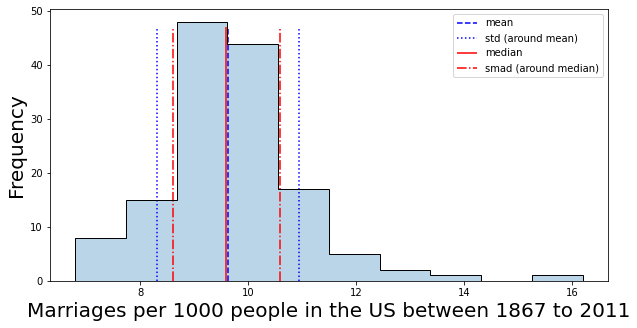

In [11]:
plt.figure(figsize=(10, 5))

n, bins, patches = plt.hist(x=df[:,4], bins=10, alpha = 0.3)
n1, bins1, patches1 = plt.hist(x=df[:,4], bins=10, color = 'black', histtype = 'step')

plt.vlines(np.nanmean(df[:,4]), 0, 47, linestyle= "--",color = "blue", label = "mean")
plt.vlines([np.nanmean(df[:,4])-np.nanstd(df[:,4]), np.nanmean(df[:,4])+np.nanstd(df[:,4])], [0,0], [47,47], color = "blue", linestyle= ":", label = "std (around mean)")


plt.vlines(np.nanmedian(df[:,4]), 0, 47, color = "red", label = "median")
plt.vlines([np.nanmedian(df[:,4])-np.nanmean(np.absolute(df[:,4] - np.nanmean(df[:,4]))), np.nanmedian(df[:,4])+np.nanmean(np.absolute(df[:,4] - np.nanmean(df[:,4])))], [0,0], [47,47],linestyle= "-.", color = "red", label = "smad (around median)")

plt.rc('axes', labelsize= 20)
#plt.errorbar([, 0, 47, color = "red", label = "std (around mean)")
plt.xlabel('Marriages per 1000 people in the US between 1867 to 2011')
plt.ylabel("Frequency")
plt.legend()